# Examples of using mobile traffic datasets
---
Digitized traffic data can be combined into times series with addition of traffic trends and anomalies.

In [1]:
import pandas as pd
import numpy as np

# Main import with traffic datasets functions
import trafficds as tds


Dataset categories: daily and weekly datasets

In [2]:
tds.ds_traffic

{'daily': ['laner12',
  'earth12',
  'feknous14_orange_ds_fixed',
  'feknous14_orange_ds_mobile',
  'feknous14_orange_us_fixed',
  'feknous14_orange_us_mobile',
  'xu17',
  'okic19_2_hour',
  'okic19_2_min',
  'wkdy_trinh17_1',
  'wkdy_trinh17_2',
  'wknd_trinh17_1',
  'wknd_trinh17_2',
  'wknd_feldmann_isp_ce_feb22',
  'wkdy_feldmann_isp_ce_mar25',
  'wkdy_moreira_pre_lock_feb19',
  'wkdy_moreira_pre_lock_may19',
  'wkdy_moreira_pre_lock_jul19',
  'wkdy_moreira_pre_lock_oct19',
  'wknd_moreira_pre_lock_feb19',
  'wknd_moreira_pre_lock_may19',
  'wknd_moreira_pre_lock_jul19',
  'wknd_moreira_pre_lock_oct19',
  'wkdy_moreira_lock_mar20',
  'wkdy_moreira_lock_apr20',
  'wkdy_moreira_lock_may20',
  'wkdy_moreira_lock_jun20',
  'wknd_moreira_lock_mar20',
  'wknd_moreira_lock_apr20',
  'wknd_moreira_lock_may20',
  'wknd_moreira_lock_jun20'],
 'weekly': ['xu17',
  'xu17_residential',
  'xu17_office',
  'xu17_transport',
  'xu17_entertainment',
  'okic19_1_dl',
  'okic19_1_ul',
  'italy_jan',

Load traffic time series from CSV file.

In [3]:
df = pd.read_csv('data/traffic.csv')

Take a look at the data columns.

In [4]:
list(df.columns)[:15]

['t_day',
 'thp_laner12',
 'thp_earth12',
 'thp_xu17',
 'thp_mon_xu17',
 'thp_tue_xu17',
 'thp_wed_xu17',
 'thp_thu_xu17',
 'thp_fri_xu17',
 'thp_sat_xu17',
 'thp_sun_xu17',
 'thp_mon_xu17_residential',
 'thp_tue_xu17_residential',
 'thp_wed_xu17_residential',
 'thp_thu_xu17_residential']

### Combining multiple traffic series
---
Combine weekly traffic datasets: the period length in weeks is indicated inside the parentheses.

In [5]:
sigma = 20
thp_max = 250

# Normal traffic growth 30% anually
normal_inc_day = 0.30 / 365
# Anomalous trend increase, 20% per week  
anom_inc_day = 0.2 / 7

# Traffic trend increase -- construct array for each day
inc_day = 4*7*[normal_inc_day] + 4*7*[anom_inc_day] + 4*7*[normal_inc_day]

df_gen = tds.combine_traffic(
    [('xu17_residential', 4), # weeks
     ('italy_mar', 4),        # weeks
     ('xu17_residential', 4), # weeks
    ], df, day_trend=inc_day, max_thp_mbps=90, coeff_wknd=0.8)    


# Adding lognormal traffic variations
tds.thp_add_lognormal(df_gen, sigma, thp_max)


In [6]:
df_gen

,t_day,thp_mbps,thp_var_mbps
0,0.000000,47.516701,57.047965
1,0.006944,45.976583,38.908488
2,0.013889,44.436465,41.287207
3,0.020833,42.896348,36.752332
4,0.027778,41.356230,38.489251
...,...,...,...
12091,83.965278,139.740338,119.502443
12092,83.972222,136.345590,93.473618
12093,83.979167,145.332137,144.727586
12094,83.986111,128.115100,125.778110


Plot traffic mean value and lognormal variations over a whole combined period.

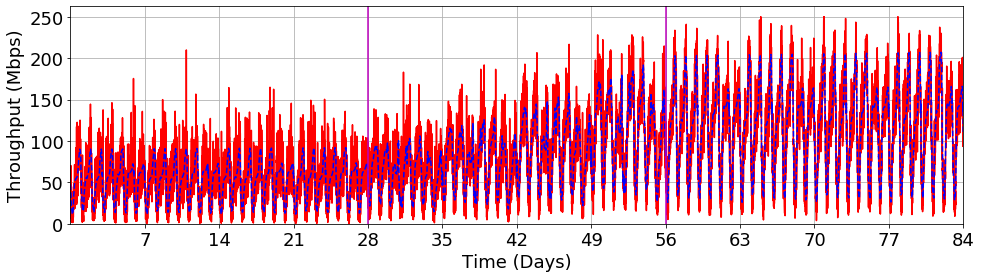

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 18
plt.figure(figsize=(16, 4))
plt.plot(df_gen.t_day, df_gen.thp_var_mbps, 'r-')
plt.plot(df_gen.t_day, df_gen.thp_mbps, 'b--')

ax = plt.gca()
ax.set_xticks(np.arange(1, 13)*7, minor=False)

plt.axvline(4*7, c='m')
plt.axvline(8*7, c='m')
plt.xlabel('Time (Days)')
plt.ylabel('Throughput (Mbps)')
plt.xlim(0, 12*7)
plt.ylim(0)
plt.grid()


### Combining weekly and daily traffic
---
Combine the following traffic sequence: two weeks of weekly dataset folowed by 7, 5 and 2 days of daily datasets.

In [8]:
inc_day = 2*7*[normal_inc_day] + 2*7*[anom_inc_day]
    
df_gen = tds.combine_traffic([('xu17_residential', 2), # weeks
                              ('laner12', 7),          # days
                              ('wkdy_trinh17_2', 5),   # days
                              ('wknd_trinh17_2', 2)    # days
                             ], df, day_trend=inc_day, max_thp_mbps=90, coeff_wknd=0.8)    

Plot the mean level of traffic profile.

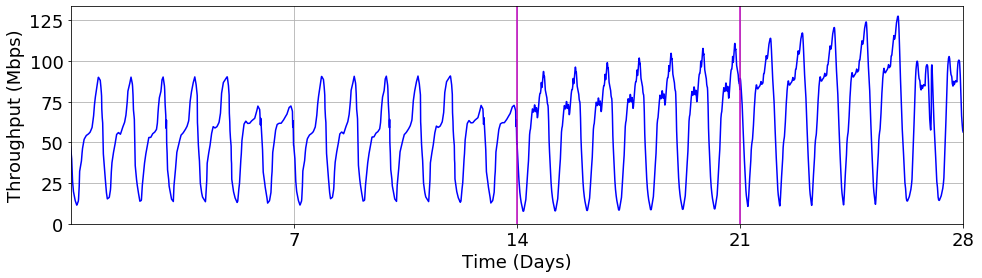

In [9]:
plt.rcParams['font.size'] = 18
plt.figure(figsize=(16, 4))
plt.plot(df_gen.t_day, df_gen.thp_mbps, 'b-')

ax = plt.gca()
ax.set_xticks(np.arange(1, 5)*7, minor=False)

plt.axvline(2*7, c='m')
plt.axvline(3*7, c='m')
plt.xlabel('Time (Days)')
plt.ylabel('Throughput (Mbps)')
plt.xlim(0, 28)
plt.ylim(0)
plt.grid()


### Adding traffic anomalies 
---
Here we will combine two traffic datasets and two traffic anomalies each 4 hours long accuring at day 11 and day 17.

In [10]:
inc_day = 2*7*[normal_inc_day] + 2*7*[anom_inc_day]

df_gen = tds.combine_traffic(
    [('xu17_residential', 2), # weeks
     ('italy_mar', 2),   # weeks
    ], df, day_trend=inc_day, max_thp_mbps=90, coeff_wknd=0.8)    

# Adding anomalous throughput - day 10
thp_adiff = 40
astart_day = 10.5
aend_day   = 10.5 + 4./24
tds.thp_add_anomaly(df_gen, thp_adiff, astart_day, aend_day)

# Adding anomalous throughput - day 16
astart_day = 16.5
aend_day   = 16.5 + 4./24
tds.thp_add_anomaly(df_gen, thp_adiff, astart_day, aend_day)

# Adding lognormal traffic variations
tds.thp_add_lognormal(df_gen, sigma, thp_max)


Generated pandas dataframe contains columns `thp_a_mbps` and `thp_a_var_mbps` with mean anomalous traffic and anomaly with lognormal traffic variations, respectively.

In [11]:
df_gen.columns

Index(['t_day', 'thp_mbps', 'thp_a_mbps', 'thp_var_mbps', 'thp_a_var_mbps'], dtype='object')

Lets plot traffic anomalies indicated by dotted green lines.

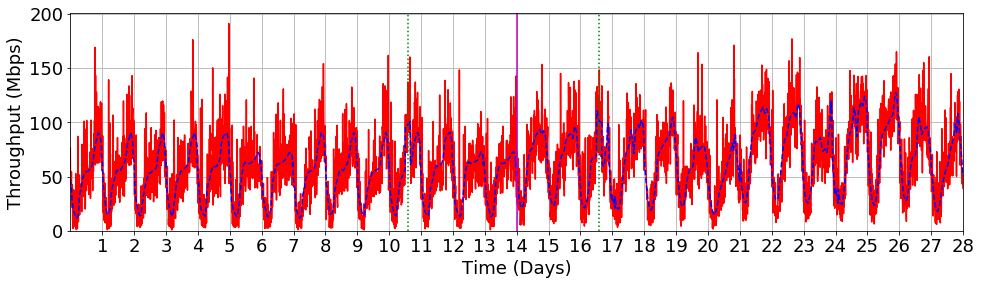

In [12]:
plt.rcParams['font.size'] = 18
plt.figure(figsize=(16, 4))
plt.plot(df_gen.t_day, df_gen.thp_a_var_mbps, 'r-')
plt.plot(df_gen.t_day, df_gen.thp_a_mbps, 'b--')

ax = plt.gca()
ax.set_xticks(np.arange(1, 4*7+1), minor=False)

plt.axvline(14, c='m')
plt.axvline(10.5 + 2/24, c='g', ls=':')
plt.axvline(16.5 + 2/24, c='g', ls=':')

plt.xlabel('Time (Days)')
plt.ylabel('Throughput (Mbps)')
plt.xlim(0, 28)
plt.ylim(0)
plt.grid()
